In [1116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [1117]:
#img = cv2.imread("test.png")
img = cv2.imread("0003.jpg")
blurred = cv2.blur(img, (3,3))
canny = cv2.Canny(blurred, 50, 200)

In [1118]:
## find the non-zero min-max coords of canny
pts = np.argwhere(canny>0)
y1,x1 = pts.min(axis=0)
y2,x2 = pts.max(axis=0)

# x1 += 100
# x2 -= 100
# y1 -= 100
# y2 += 100

In [1119]:
ideal_aspect = 1920/1080
width = y2 - y1
height = x2 - x1
olmasi_gereken_height = width*ideal_aspect
olmasi_gereken_width = height/ideal_aspect
aspect = height/width

print(height,width)
print(aspect)
print("")

# 2 çalışıyor
if aspect > ideal_aspect:
    print("2 olması gereken ölçü", height, round(olmasi_gereken_width), abs(round((olmasi_gereken_width-height)/4)))
    y1 -= abs(round((olmasi_gereken_width-height)/4))
    y2 += abs(round((olmasi_gereken_width-height)/4))
else:
    print("1 olması gereken ölçü", width, round(olmasi_gereken_height), abs(round((olmasi_gereken_height-width)/4)))
    x1 -= abs(round((olmasi_gereken_height-width)/6))
    x2 += abs(round((olmasi_gereken_height-width)/6))

print("sa2",y2-y1,x2-x1)
print("sa2",(x2-x1)/(y2-y1))

2316 1379
1.6794778825235679

1 olması gereken ölçü 1379 2452 268
sa2 1379 2674
sa2 1.9390862944162437


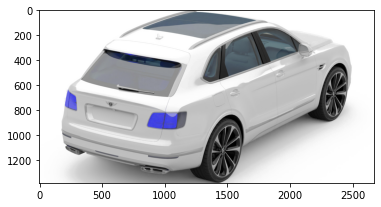

In [1120]:
## crop the region
cropped = img[y1:y2, x1:x2]
cv2.imwrite("0003.png", cropped)
plt.imshow(cropped)